In [ ]:
X = [] #Position in image
TX =[] #Robot arm belief position (forward kinematics)
Y = [] #sev (shoulder, elbow, wrist)

import json
with open("robotArmDataSet.json", "rb") as fp:
    jsonContent = json.load(fp)

    
    X = jsonContent[0]
    TX = jsonContent[1]
    Y = jsonContent[2]

In [ ]:

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

trainInput, testInput, trainOutput, testOutput = train_test_split(X, Y, test_size=0.4, random_state= 0)

pls2 = PLSRegression(n_components=2)
pls2.fit(trainInput, trainOutput)

s = pls2.score(testInput, testOutput)

print(s)
Y_pred = pls2.predict(X)
#print(Y)
#print(Y_pred)


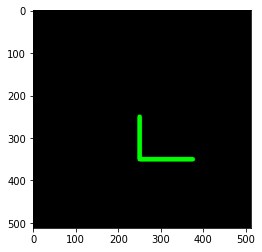

In [1]:
from RobotArmView import RobotArmView
from FakeKit import FakeKit
from RobotArm import RobotArm



fake = FakeKit()
b = RobotArm(fake)
b.wrist(10)
rv = RobotArmView(b)

rv.draw()

In [ ]:





YPT = []
errors = []
#forward kinematics

import math 
fake = FakeKit()
b = RobotArm(fake)
i = 0
for yp in Y_pred:
    s= float(yp[0])
    e= float(yp[1])
    w= float(yp[2])

    b.setState(RobotArm.ROTATE_NORMAL, s,e,w, 0)

    ypt = [b.wristBone.getPos().x, b.wristBone.getPos().y]
    YPT.append(ypt)

    xdiff = TX[i][0] - YPT[i][0]
    ydiff = TX[i][1] - YPT[i][1]
    error = math.sqrt(xdiff * xdiff + ydiff * ydiff)

    errors.append(error)
    i += 1



In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(errors)
 
# To show the plot
plt.show()